1.

In [5]:
import numpy as np

# Derivada de cinco puntos
def five_point_derivative(f, x, h):
    n = len(x)
    fprime = np.zeros_like(x)

    for i in range(n):
        if i < 4:
            # Derivada adelantada
            fprime[i] = (-25 * f(x[i]) + 48 * f(x[i + 1]) - 36 * f(x[i + 2]) +
                         16 * f(x[i + 3]) - 3 * f(x[i + 4])) / (12 * h)
        elif i > n - 5:
            # Derivada atrasada
            fprime[i] = (25 * f(x[i]) - 48 * f(x[i - 1]) + 36 * f(x[i - 2]) -
                         16 * f(x[i - 3]) + 3 * f(x[i - 4])) / (12 * h)
        else:
            # Derivada centrada
            fprime[i] = (f(x[i - 2]) - 8 * f(x[i - 1]) + 8 * f(x[i + 1]) - f(x[i + 2])) / (12 * h)

    return fprime

# Segunda derivada de cinco puntos
def five_point_second_derivative(f, x, h):
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * h**2)

# Funcion y derivadas exactas
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)
d2f = lambda x: -np.cos(x)

# Puntos de evaluacion
x = np.linspace(0, 2*np.pi, 10)
h = x[1] - x[0]
fprima = five_point_derivative(f, x, h)

# Punto de evaluacion
x0 = np.pi / 8

# Aproximacion por interpolacion en x0
aproximado = np.interp(x0, x, fprima)
exacto = df(x0)
error = abs(aproximado - exacto)

print("Primera derivada f'(pi/8):")
print(f"  Aproximada por interpolación: {aproximado}")
print(f"  Exacta:                        {exacto}")
print(f"  Error absoluto:                {error:.2e}")
print()

# Evaluar f'(pi/8) variando h
print("Convergencia de f'(pi/8) variando h:")
h_vals = np.logspace(-1, -5, 5) #5 valores deberian ser suficientes
for h_val in h_vals:
    approx = (-f(x0 + 2*h_val) + 8*f(x0 + h_val) - 8*f(x0 - h_val) + f(x0 - 2*h_val)) / (12*h_val)
    err = abs(approx - df(x0))
    print(f"h = {h_val:.1e}, f'(pi/8) ≈ {approx:.8f}, error = {err:.2e}")
print()

# Segunda derivada f''(pi/8) con h = 0.05
h2 = 0.05
d2_approx = five_point_second_derivative(f, x0, h2)
d2_exact = d2f(x0)
d2_error = abs(d2_approx - d2_exact)

print("Segunda derivada f''(pi/8):")
print(f"  Aproximada con h = 0.05: {d2_approx}")
print(f"  Exacta:                   {d2_exact}")
print(f"  Error absoluto:           {d2_error:.2e}")
print()

#Comparamos h = 0.1 y h = 0.01
d2_h_grande = five_point_second_derivative(f, x0, 0.1)
d2_h_pequeño = five_point_second_derivative(f, x0, 0.01)
err_grande = abs(d2_h_grande - d2_exact)
err_pequeño = abs(d2_h_pequeño - d2_exact)

print("Mejora el error con h menor o mayor")
print(f"  Error con h = 0.1 : {err_grande:.2e}")
print(f"  Error con h = 0.01: {err_pequeño:.2e}")
if err_pequeño < err_grande:
    print(" El error mejora con un h menor.")
else:
    print(" El error mejora con un h mayor.")



Primera derivada f'(pi/8):
  Aproximada por interpolación: -0.3202213850145999
  Exacta:                        -0.3826834323650898
  Error absoluto:                6.25e-02

Convergencia de f'(pi/8) variando h:
h = 1.0e-01, f'(pi/8) ≈ -0.38268216, error = 1.27e-06
h = 1.0e-02, f'(pi/8) ≈ -0.38268343, error = 1.28e-10
h = 1.0e-03, f'(pi/8) ≈ -0.38268343, error = 1.17e-14
h = 1.0e-04, f'(pi/8) ≈ -0.38268343, error = 1.23e-13
h = 1.0e-05, f'(pi/8) ≈ -0.38268343, error = 6.24e-14

Segunda derivada f''(pi/8):
  Aproximada con h = 0.05: -0.9238794683673055
  Exacta:                   -0.9238795325112867
  Error absoluto:           6.41e-08

Mejora el error con h menor o mayor
  Error con h = 0.1 : 1.03e-06
  Error con h = 0.01: 1.02e-10
 El error mejora con un h menor.


In [2]:
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.8 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
jaxlib 0.5.1 

2.

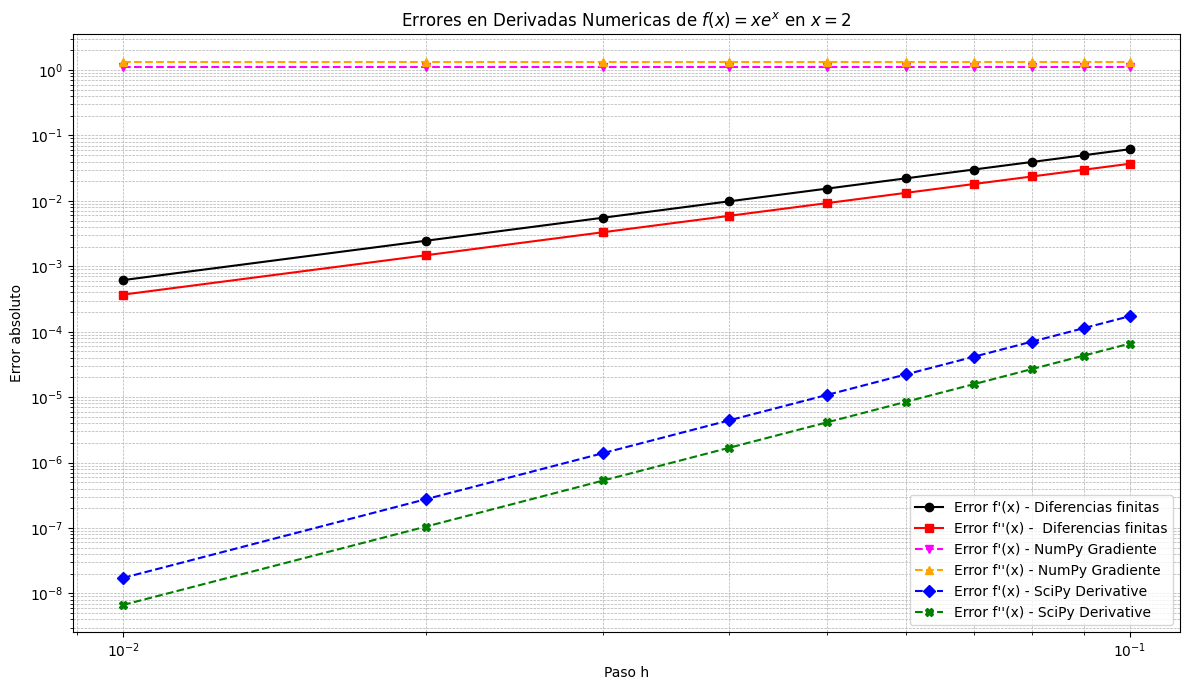

Valor optimo de h: 0.0100


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Funcion y derivadas
f = lambda x: x * np.exp(x)
df = lambda x: np.exp(x) + x * np.exp(x)
d2f = lambda x: 2 * np.exp(x) + x * np.exp(x)

# Punto donde se evaluan las derivadas
x0 = 2.0

# Valores de h a evaluar
h_vals = np.linspace(0.01, 0.1, 10)

# Errores
err_df_fd = []
err_d2f_fd = []
err_df_np = []
err_d2f_np = []
err_df_sp = []
err_d2f_sp = []

# Puntos base fijos: 6 puntos entre 1.8 y 2.2
x_base = np.linspace(1.8, 2.2, 6)

for h in h_vals:
    #Diferencias finitas centradas
    df_fd = (f(x0 + h) - f(x0 - h)) / (2 * h)
    d2f_fd = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h**2

    err_df_fd.append(abs(df(x0) - df_fd))
    err_d2f_fd.append(abs(d2f(x0) - d2f_fd))

    #Gradient: usando puntos fijos con paso en h
    x_arr = np.linspace(1.8, 2.2, 6)
    y_arr = f(x_arr)

    df_arr = np.gradient(y_arr, x_arr[1] - x_arr[0])
    d2f_arr = np.gradient(df_arr, x_arr[1] - x_arr[0])

    idx = np.argmin(np.abs(x_arr - x0))  # x0 = 2.0
    err_df_np.append(abs(df(x0) - df_arr[idx]))
    err_d2f_np.append(abs(d2f(x0) - d2f_arr[idx]))

    #Derivadas con scipy.derivative
    df_sp = derivative(f, x0, dx=h, n=1, order=5)
    d2f_sp = derivative(f, x0, dx=h, n=2, order=5)

    err_df_sp.append(abs(df(x0) - df_sp))
    err_d2f_sp.append(abs(d2f(x0) - d2f_sp))

#Grafico de errores
plt.figure(figsize=(12, 7))

plt.loglog(h_vals, err_df_fd, 'o-', color='black', label="Error f'(x) - Diferencias finitas")
plt.loglog(h_vals, err_d2f_fd, 's-', color='red', label="Error f''(x) -  Diferencias finitas")
plt.loglog(h_vals, err_df_np, 'v--', color='magenta', label="Error f'(x) - NumPy Gradiente")
plt.loglog(h_vals, err_d2f_np, '^--', color='orange', label="Error f''(x) - NumPy Gradiente")
plt.loglog(h_vals, err_df_sp, 'D--', color='blue', label="Error f'(x) - SciPy Derivative")
plt.loglog(h_vals, err_d2f_sp, 'X--', color='green', label="Error f''(x) - SciPy Derivative")

plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.title('Errores en Derivadas Numericas de $f(x) = x e^x$ en $x = 2$')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Valor optimo de h para diferencias finitas
total_error_fd = np.array(err_df_fd) + np.array(err_d2f_fd)
mejor_h = h_vals[np.argmin(total_error_fd)]
print(f"Valor optimo de h: {mejor_h:.4f}")
